In [1]:
from google.colab import files
uploaded = files.upload()


Saving Bank_Churn.csv to Bank_Churn.csv


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
df = pd.read_csv("Bank_Churn.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.isnull().sum())
print(df.describe())


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.0900

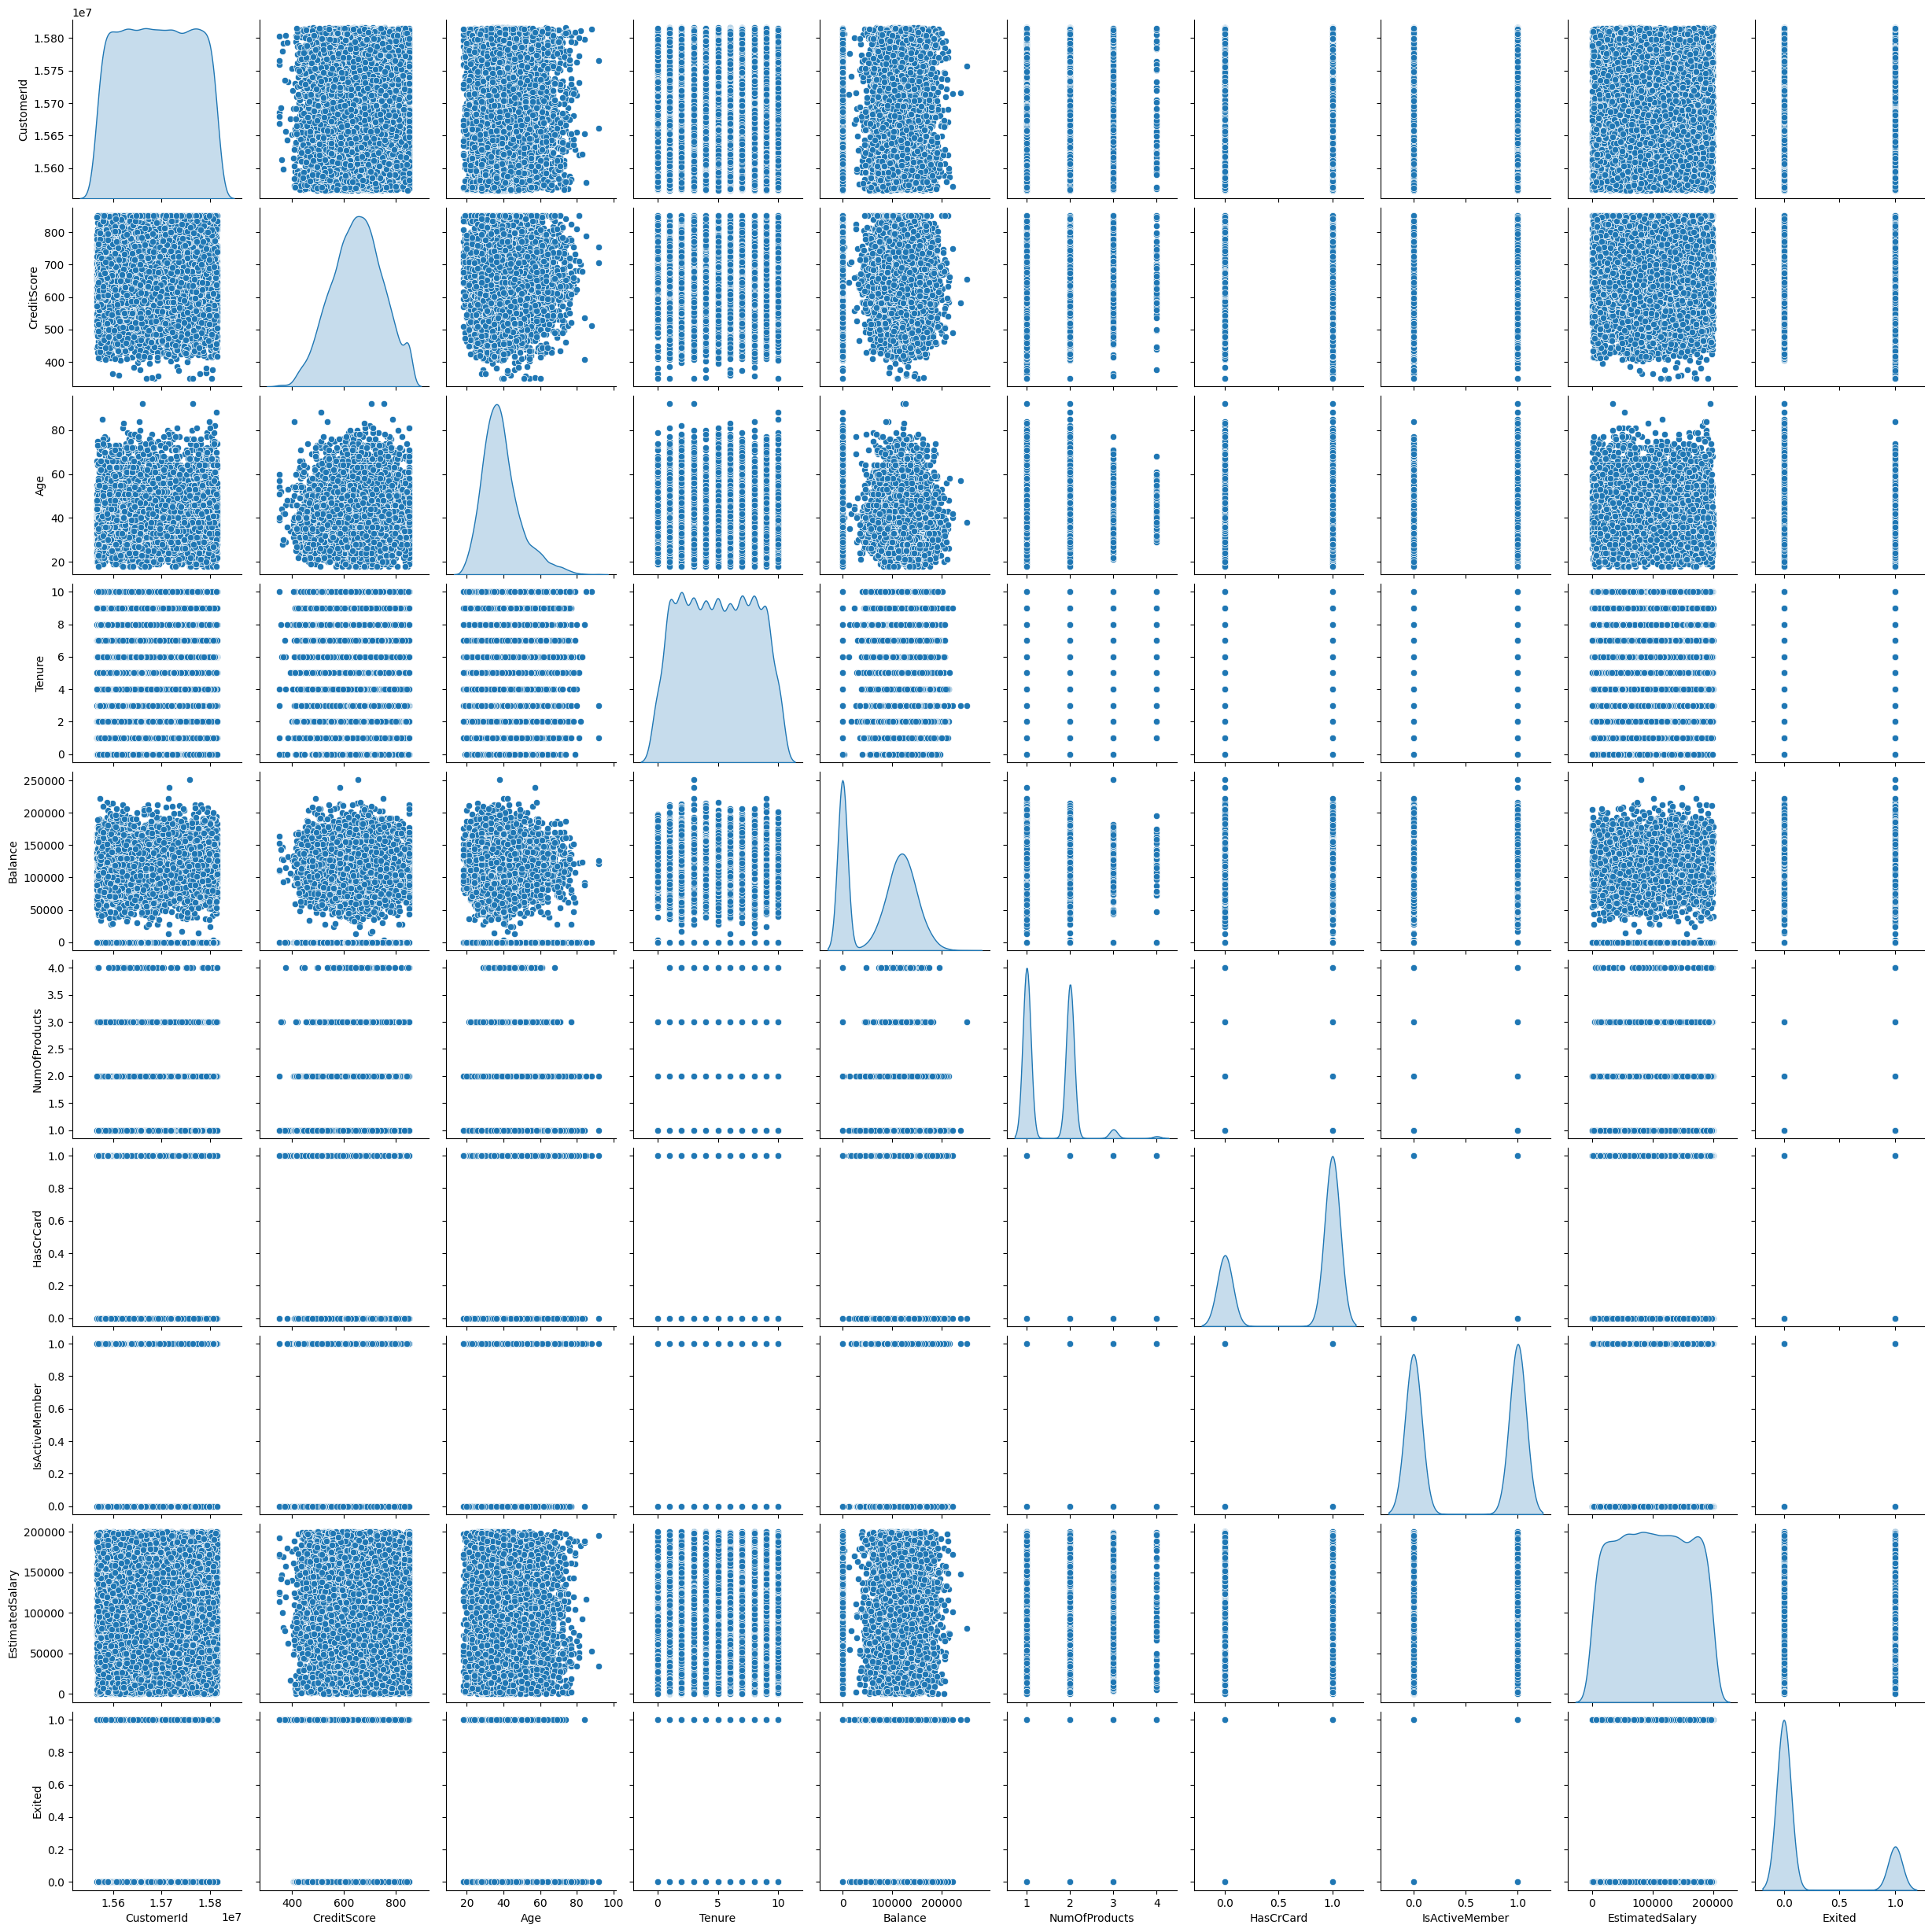

In [5]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.show()


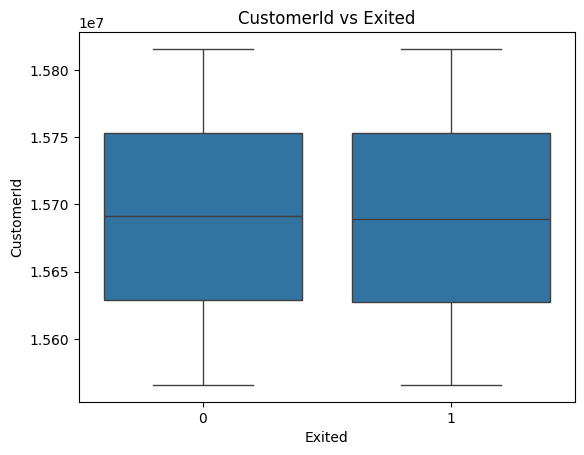

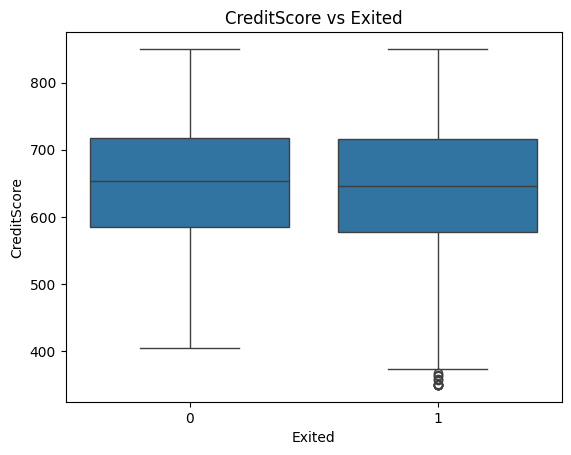

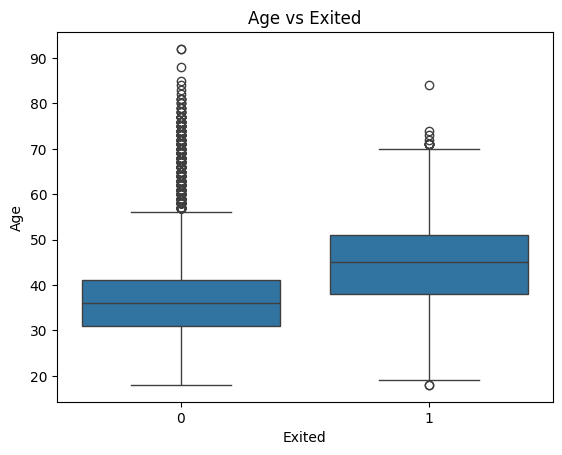

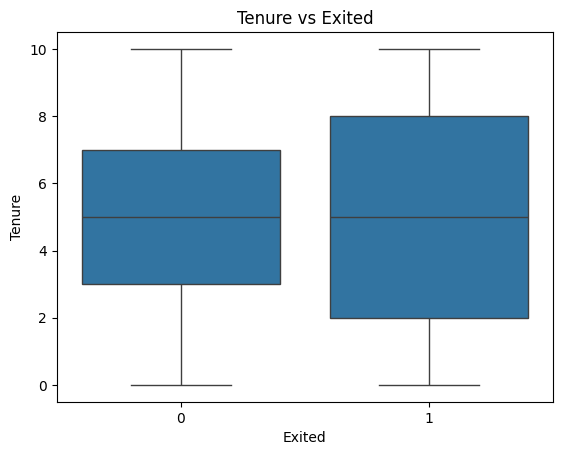

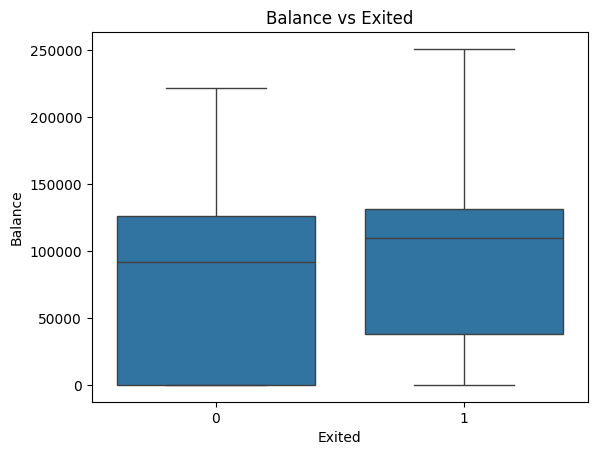

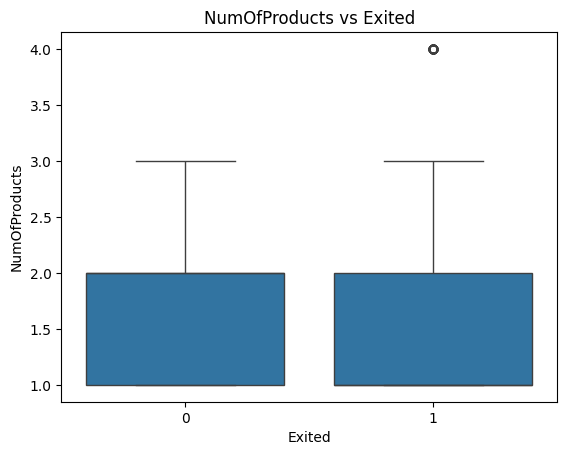

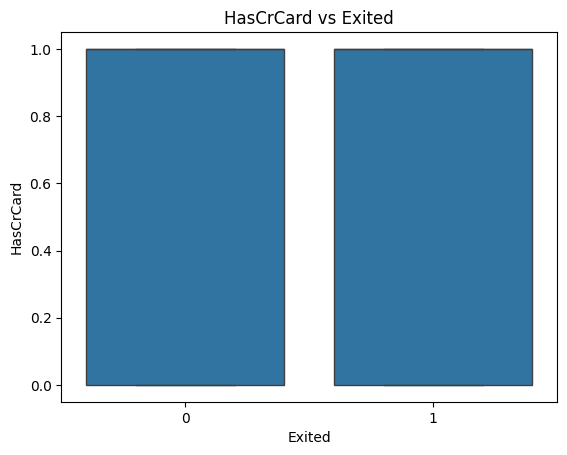

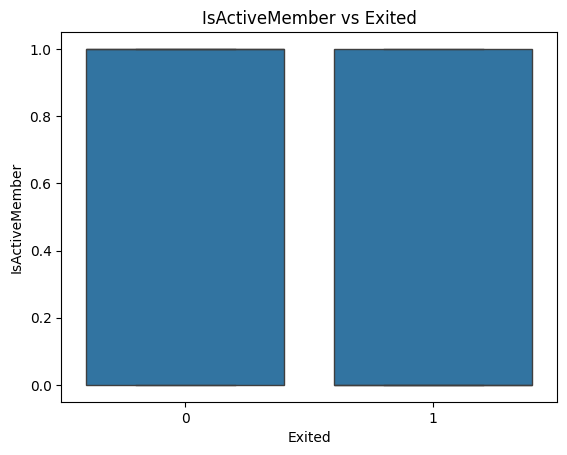

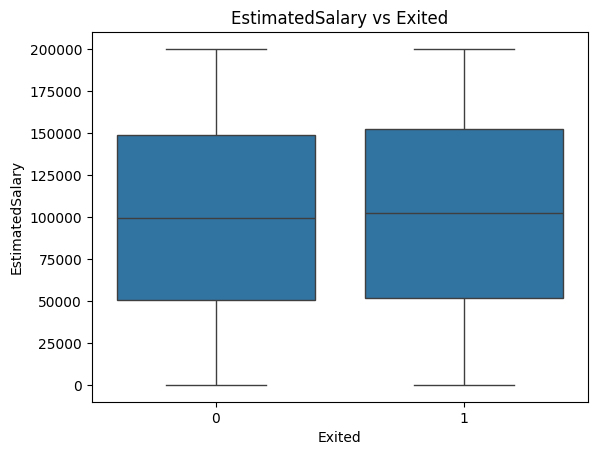

In [6]:
for col in numeric_cols:
    if col != 'Exited':
        sns.boxplot(x='Exited', y=col, data=df)
        plt.title(f'{col} vs Exited')
        plt.show()


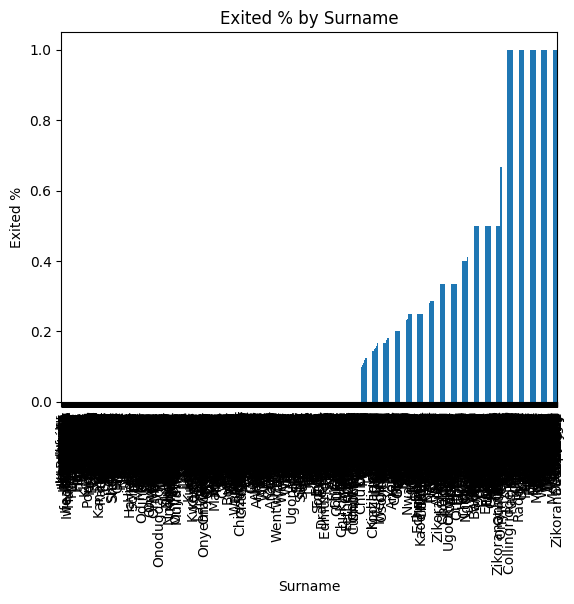

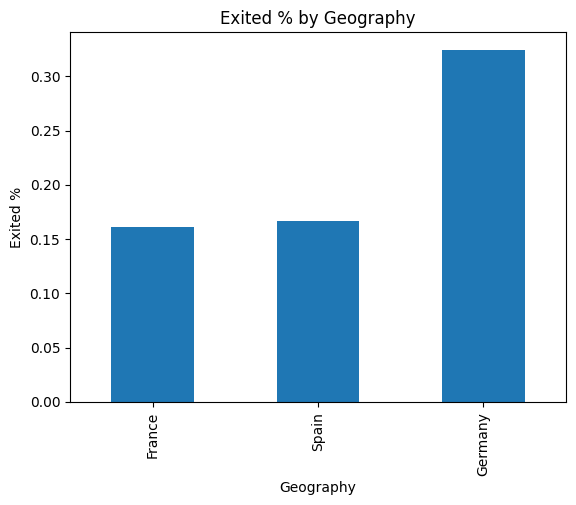

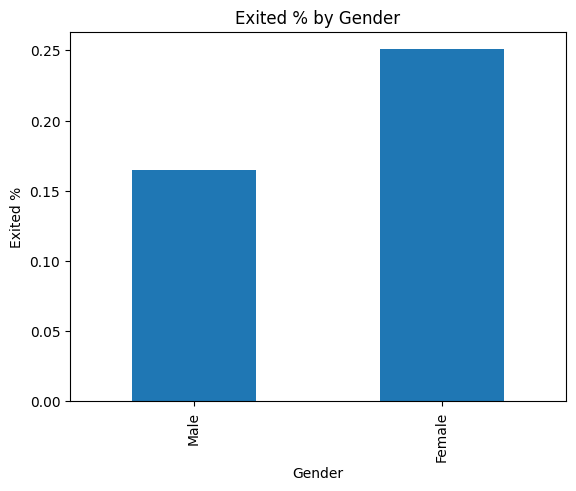

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    exit_rate = df.groupby(col)['Exited'].mean().sort_values()
    exit_rate.plot(kind='bar')
    plt.title(f'Exited % by {col}')
    plt.ylabel('Exited %')
    plt.show()


In [8]:
df = df.drop(['CustomerId', 'Surname'], axis=1)


In [9]:
df['balance_to_income'] = df['Balance'] / df['EstimatedSalary']
df['income_v_products'] = df['EstimatedSalary'] / df['NumOfProducts']


In [10]:
import numpy as np

# Calculate the mean, ignoring possible division by zero or NaN values
mean_balance_to_income = df['balance_to_income'].replace([np.inf, -np.inf], np.nan).dropna().mean()

print(f"Mean of balance_to_income: {mean_balance_to_income:.4f}")

Mean of balance_to_income: 3.8787


In [11]:
df = pd.get_dummies(df, drop_first=True)


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

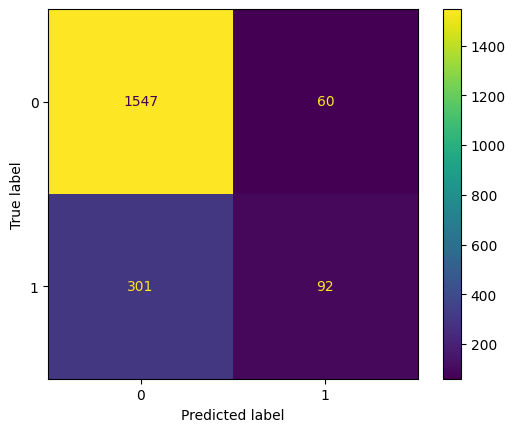

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8195
Precision: 0.6052631578947368
Recall: 0.2340966921119593
F1 Score: 0.3376146788990826


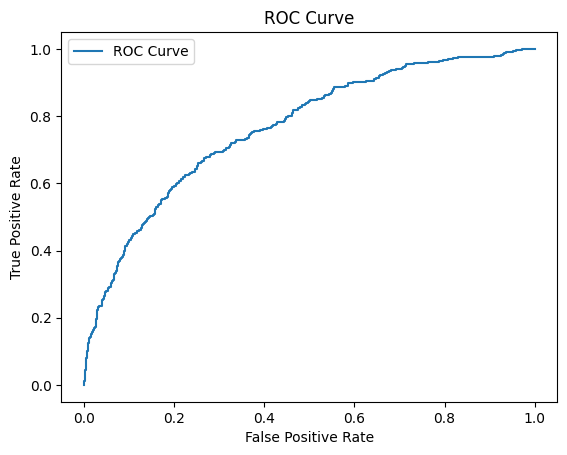

AUC: 0.7656673807815997


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC:", roc_auc_score(y_test, y_prob))


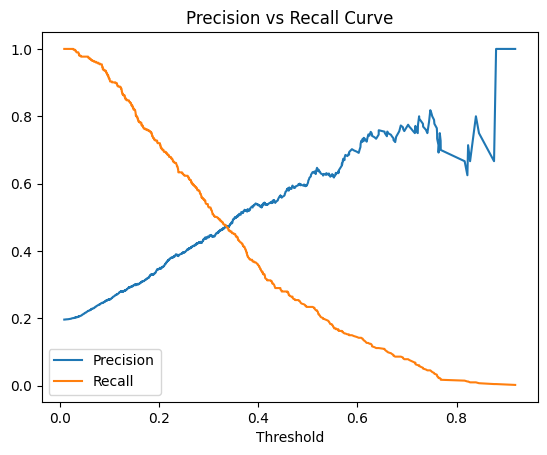

In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision vs Recall Curve')
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_


In [20]:
from sklearn.metrics import roc_auc_score

y_rf_pred = best_rf.predict(X_test)
y_rf_prob = best_rf.predict_proba(X_test)[:,1]

print("Random Forest Test Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Random Forest AUC:", roc_auc_score(y_test, y_rf_prob))


Random Forest Test Accuracy: 0.8665
Random Forest AUC: 0.8616042093195958


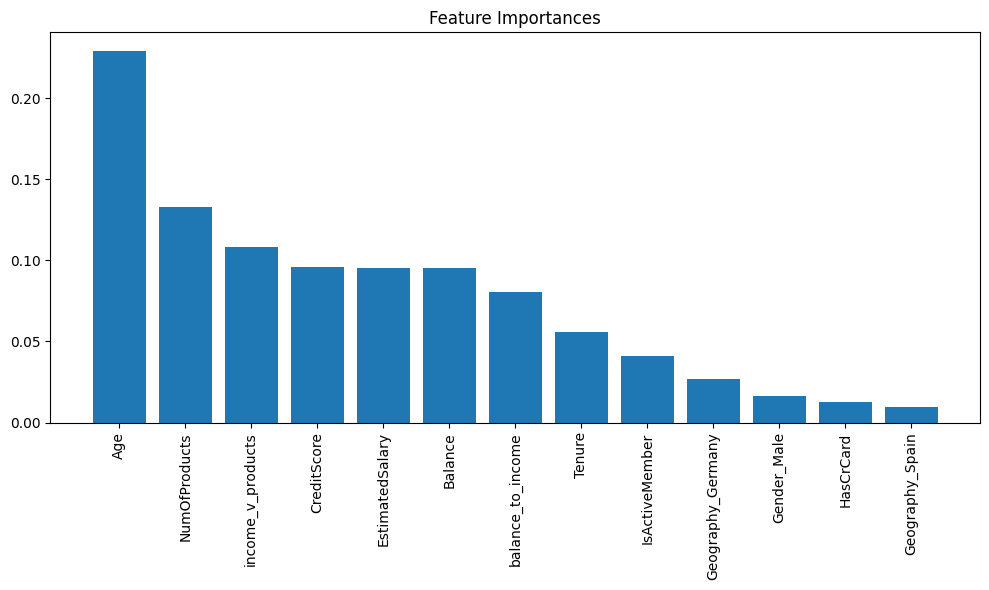

In [21]:
import numpy as np

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [22]:
mean_balance_to_income = df["balance_to_income"].mean()
print("Mean of 'balance_to_income':", mean_balance_to_income)


Mean of 'balance_to_income': 3.878702931493795


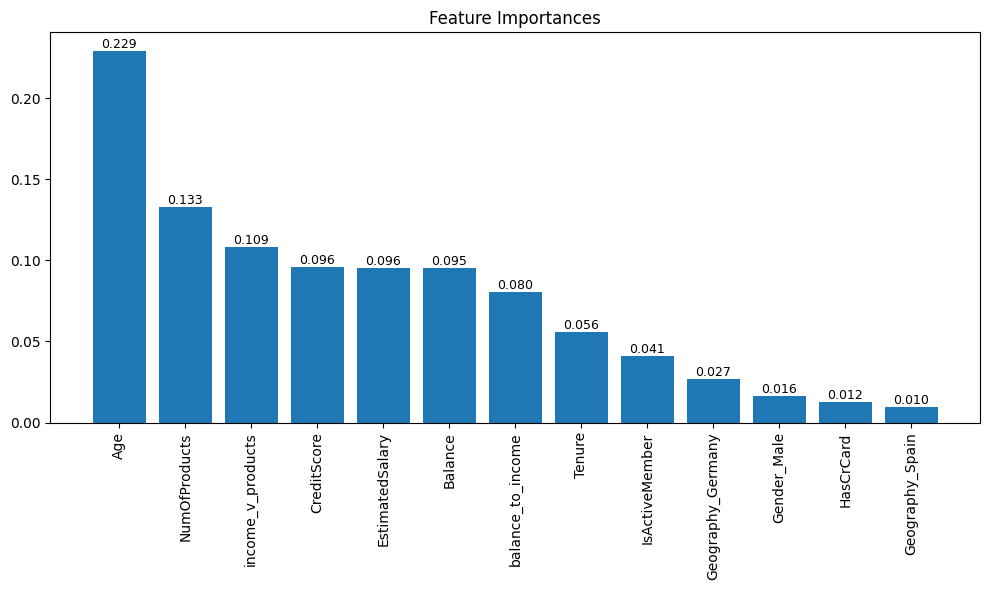

In [23]:
import numpy as np
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
bars = plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()

# Add numeric values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.show()


In [24]:
# Calculate the mean, ignoring possible division by zero or NaN values
mean_balance_to_income = df['balance_to_income'].replace([np.inf, -np.inf], np.nan).dropna().mean()

print(f"Mean of balance_to_income: {mean_balance_to_income:.4f}")

Mean of balance_to_income: 3.8787
